In [2]:
import nltk
import re
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [3]:
dataset=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/SpamClassifier/master/smsspamcollection/SMSSpamCollection",error_bad_lines=False,sep="\t",names=["label","messages"])

In [4]:
X=dataset.messages
y=dataset.label

In [10]:
X.shape

(5572,)

In [5]:
y=pd.get_dummies(y)

In [6]:
y=y["spam"]

In [7]:
word=WordNetLemmatizer()

In [8]:
array=[]
for i in range(len(X)):
    review=re.sub("[^a-zA-Z]"," ",X[i])
    review=review.lower()
    review=review.split()
    review=[word.lemmatize(words) for words in review if word not in set(stopwords.words("english"))]
    review=" ".join(review)
    array.append(review)


In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
countvec=CountVectorizer()
tf=TfidfVectorizer()

In [12]:
countvector=countvec.fit_transform(array).toarray()

In [13]:
tfvector=tf.fit_transform(array).toarray()

In [16]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(countvector,y,test_size=0.3,random_state=0)
X_train1,X_test1,y_train1,y_test1=train_test_split(tfvector,y,test_size=0.3,random_state=0)


In [17]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model1=MultinomialNB()

In [18]:
model.fit(X_train,y_train)
model1.fit(X_train1,y_train1)

MultinomialNB()

In [19]:
mpred=model.predict(X_test)
mpred1=model1.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,mpred)
d=confusion_matrix(y_test,mpred1)

In [21]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


array([[1428,   23],
       [  12,  209]], dtype=int64)

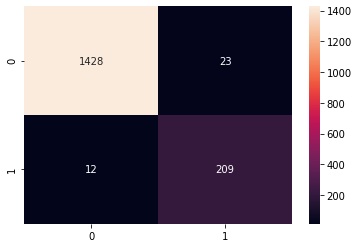

In [24]:
sns.heatmap(c,annot=True,fmt="d")
c


<AxesSubplot:>

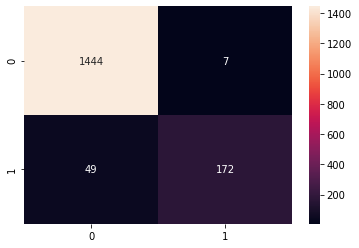

In [25]:
sns.heatmap(d,annot=True,fmt="d")

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,mpred) #for countvectorizer the accuracy is more 

0.979066985645933

In [28]:
accuracy_score(y_test,mpred1) #for tfidf the accuracy is less when compared to countvectorizer

0.9665071770334929

In [34]:
model.fit(countvector,y)

MultinomialNB()

In [29]:
import pickle

In [36]:
filename = 'spam_cls.pkl'
pickle.dump(model, open(filename, 'wb'))

In [37]:
filename="vect_transform.pkl"
pickle.dump(countvec,open(filename,"wb"))